# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.7YINT0_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.7YINT0_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.7YINT0_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


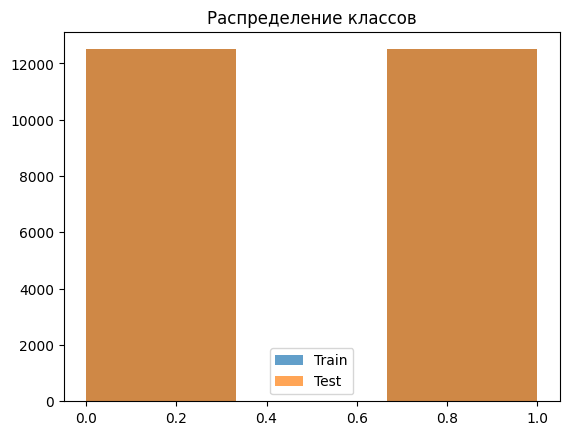

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
# Используйте tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)
train_ds, test_ds = tfds.load('imdb_reviews',
                               split=['train', 'test'],
                               as_supervised=True,
                               shuffle_files=True)

x_train = []
y_train = []
x_test = []
y_test = []

for text, label in train_ds:
    x_train.append(text.numpy().decode('utf-8'))
    y_train.append(label.numpy())

for text, label in test_ds:
    x_test.append(text.numpy().decode('utf-8'))
    y_test.append(label.numpy())

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [2]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
### ВАШ КОД ЗДЕСЬ ###
vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=200)

# 4. Адаптируйте векторзатор на тренировочных текстах
### ВАШ КОД ЗДЕСЬ ###
vectorizer.adapt(x_train)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [3]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
model = keras.Sequential([
    keras.layers.Input(shape=(200,)),
    keras.layers.Embedding(input_dim=10000, output_dim=128),
    keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.6782 - loss: 0.5631 - precision: 0.6688 - recall: 0.7327 - val_accuracy: 0.8618 - val_loss: 0.3267 - val_precision: 0.8480 - val_recall: 0.8858
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9250 - loss: 0.2051 - precision: 0.9204 - recall: 0.9302 - val_accuracy: 0.8654 - val_loss: 0.3215 - val_precision: 0.8722 - val_recall: 0.8601
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9886 - loss: 0.0535 - precision: 0.9877 - recall: 0.9891 - val_accuracy: 0.8654 - val_loss: 0.3963 - val_precision: 0.8798 - val_recall: 0.8503
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.9992 - loss: 0.0093 - precision: 0.9991 - recall: 0.9992 - val_accuracy: 0.8680 - val_loss: 0.4559 - val_precision: 0.8613 - val_recall: 0.8811
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9999 - loss: 0.0020 - precision: 0.9997 - recall: 1.0000 - val_accuracy: 0.8680 - val_los

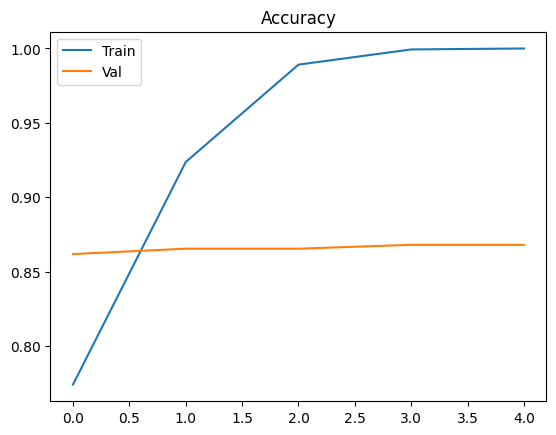

In [4]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
### ВАШ КОД ЗДЕСЬ ###
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
### ВАШ КОД ЗДЕСЬ ###
history = model.fit(
    x_train_vec, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [6]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
test_loss, test_acc, test_prec, test_rec = model.evaluate(
    x_test_vec, y_test,
    verbose=0
)


print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    ### ВАШ КОД ЗДЕСЬ ###
    text_vec = vectorizer([text]).numpy()
    pred_prob = model.predict(text_vec, verbose=0)
    pred_label = "POS" if pred_prob[0][0] > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

Тестовая accuracy: 0.8650
Тестовая precision: 0.8636
Тестовая recall: 0.8669
There are films that make careers. For George Rome... | True: POS | Pred: POS (0.98)
A blackly comic tale of a down-trodden priest, Naz... | True: POS | Pred: POS (0.71)
Scary Movie 1-4, Epic Movie, Date Movie, Meet the ... | True: NEG | Pred: NEG (0.00)
Poor Shirley MacLaine tries hard to lend some grav... | True: NEG | Pred: NEG (0.00)
As a former Erasmus student I enjoyed this film ve... | True: POS | Pred: POS (1.00)
My God, Ryan Gosling has made a lot of deep charac... | True: POS | Pred: POS (1.00)
This film just won the best film award at the Clev... | True: POS | Pred: POS (1.00)
The cast for this production of Rigoletto is excel... | True: POS | Pred: POS (1.00)
As long as you keep in mind that the production of... | True: NEG | Pred: NEG (0.15)
Every great once in a while, you stumble upon a mo... | True: POS | Pred: NEG (0.01)


## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  Итоговая точность на тесте: 0.8650
2.  Модель достигла хорошей тестовой точности 86.5%, что соответствует критериям задания.Однако наблюдается сильное переобучение на 5-й эпохе: точность на обучении 99.99%, а на валидации только 86.8%. Возможно, стоит использовать раннюю остановку или методы регуляризации. Модель правильно классифицировала 9 из 10 примеров, ошибка в 10-м примере связана с неоднозначностью формулировки.
3. Как я уже написала, модель неверно поняла пример 10 ("Every great once in a while, you stumble upon a mo..."). Модель предсказала для него отрицательный класс (NEG) с вероятностью всего 0.01, хотя истинная метка была положительной (POS). Вероятно, ошибка связана с лингвистической сложностью данного отзыва. Фраза "stumble upon" обычно имеет нейтрально-негативную коннотацию в значении "случайно наткнуться", что могло сбить модель с толку. Кроме того, конструкция "Every great once in a while" представляет собой редкую идиоматическую формулировку, которая могла быть недостаточно представлена в обучающих данных. Дополнительным фактором могло стать переобучение модели, которое мы наблюдали в процессе обучения. Модель, достигшая почти 100% точности на обучающей выборке, иногда теряет способность корректно интерпретировать неоднозначные или сложные лингвистические конструкции.

In [8]:
# ЯЧЕЙКА ДЛЯ ОЧИСТКИ МЕТАДАННЫХ (выполнить последней)
import json
import os

# Если вы хотите сохранить файл напрямую
notebook_path = 'Naymova_convnet_hw.ipynb'

if os.path.exists(notebook_path):
    # Читаем ноутбук
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = json.load(f)

    # Удаляем проблемные метаданные
    if 'metadata' in notebook:
        # Удаляем widgets если есть
        if 'widgets' in notebook['metadata']:
            del notebook['metadata']['widgets']

        # Удаляем другие проблемные поля Colab
        if 'colab' in notebook['metadata']:
            # Можно оставить colab, но очистить от лишнего
            if 'widgets' in notebook['metadata']['colab']:
                del notebook['metadata']['colab']['widgets']

    # Сохраняем очищенный ноутбук
    with open('Naymova_convnet_hw_cleaned.ipynb', 'w', encoding='utf-8') as f:
        json.dump(notebook, f, indent=2, ensure_ascii=False)

    print("✓ Ноутбук очищен и сохранен как 'Naymova_convnet_hw_cleaned.ipynb'")
    print("  Загрузите этот файл на GitHub")
else:
    print("Файл не найден. Сохраните ноутбук сначала через File → Save")

Файл не найден. Сохраните ноутбук сначала через File → Save
